In [22]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from typing import List
from practical.ProcessMining.group1.task4.tokenreplay import TokenReplay
from practical.ProcessMining.group1.task4.comparison import ModelComparator
from practical.ProcessMining.group1.shared import utils
from practical.ProcessMining.group1.shared.visualizer import Visualizer
import os

In [23]:
BASE = utils.SAMPLES_PATH

def get_path(file):
    return str(BASE / file)

clustered_LOGS = get_path("simple_event_logs_modified.txt")

def get_logs(file_path):
   return utils.import_csv(file_path)

def custom_to_pm4py_log(log):
    log = utils.event_log_to_pm4py_dataframe(log)
    return log_converter.to_event_log.apply(log)

In [24]:
def compare_base_real_logs(csv_file="DomesticDeclarations_cleansed.csv", x_dim="f", y_dim="g"):
    path = get_path(csv_file)
    print('file_path ======', path)
    log = utils.import_csv(path)
    event_log = log_converter.to_event_log.apply(log)

    miners = init_miners_with_log(event_log)

    plot_miner_scatter(miners, 'Basic_real_eventlog', x_dim, y_dim)

In [33]:
def compare_sub_logs(sublogs_path, x_dim="f", y_dim="g"):
    for i in range(10):
       file_path = os.path.join(sublogs_path, f'cluster_{i}.csv')
       print('file_path ======', file_path)
       log = utils.import_csv(file_path)
       event_log = log_converter.to_event_log.apply(log)
       miners = init_miners_with_log(event_log)
       plot_miner_scatter(miners, 'sublogs_' + str(i), x_dim, y_dim)

In [26]:
def init_miners_with_log(event_log) -> List[TokenReplay]:
    # Alpha
    net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(event_log)
    # Heuristic
    net_heuristic, im_heuristic, fm_heuristic = pm4py.discover_petri_net_heuristics(event_log)
    # Inductive
    net_inductive, im_inductive, fm_inductive = pm4py.discover_petri_net_inductive(event_log)
    # Inductive Frequent
    net_inductive_inf, im_inductive_inf, fm_inductive_inf = pm4py.discover_petri_net_inductive(event_log, noise_threshold=0.7)

    m1 = TokenReplay(event_log, net_alpha, im_alpha, fm_alpha, "AM")
    m2 = TokenReplay(event_log, net_heuristic, im_heuristic, fm_heuristic, "HM")
    m3 = TokenReplay(event_log, net_inductive, im_inductive, fm_inductive, "IM")
    m4 = TokenReplay(event_log, net_inductive_inf, im_inductive_inf, fm_inductive_inf, "IMi")

    miners = [m1, m2, m3, m4]
    
    shuffled_log = m1.shuffle_activities()
    for miner in miners:
        get_visualizer(miner, shuffled_log)

    return miners

In [27]:
def plot_miner_scatter(miners, desc, x_dim, y_dim):
    comparator = ModelComparator(miners)

    print("===== Pareto Efficient Models for log:", desc, "=====")
    results = comparator.run(x_dimension=x_dim, y_dimension=y_dim)
    print(results)

In [28]:
def get_visualizer(miner, shuffled_log):
    print("MinerType", miner.net_type)
    miner.run(shuffled_log)
    tokens = miner.get_unconformity_tokens()

    vizard = Visualizer()
    graph = vizard.build_petri_net(
        miner.net, miner.initial_marking, miner.final_marking, tokens
    )
    vizard.display(graph)

In [ ]:
compare_base_real_logs()

file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_0.csv


replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

MinerType AM


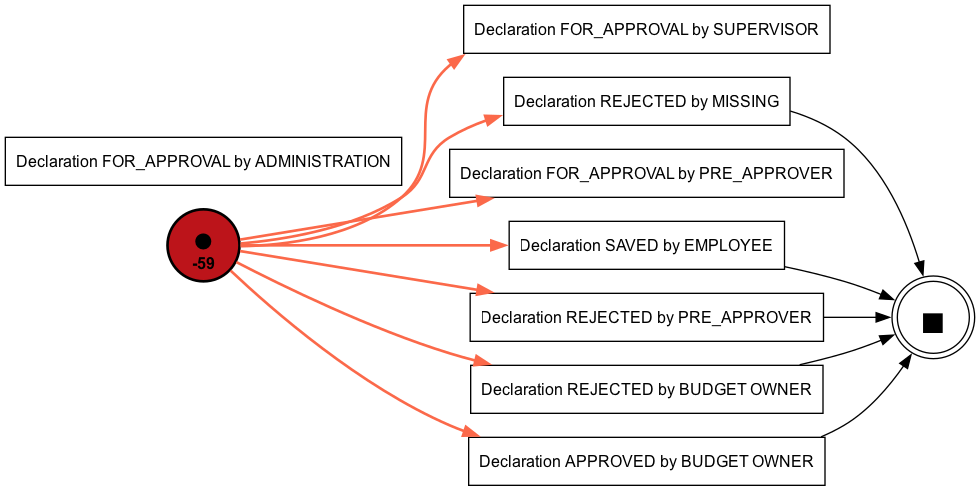

MinerType HM


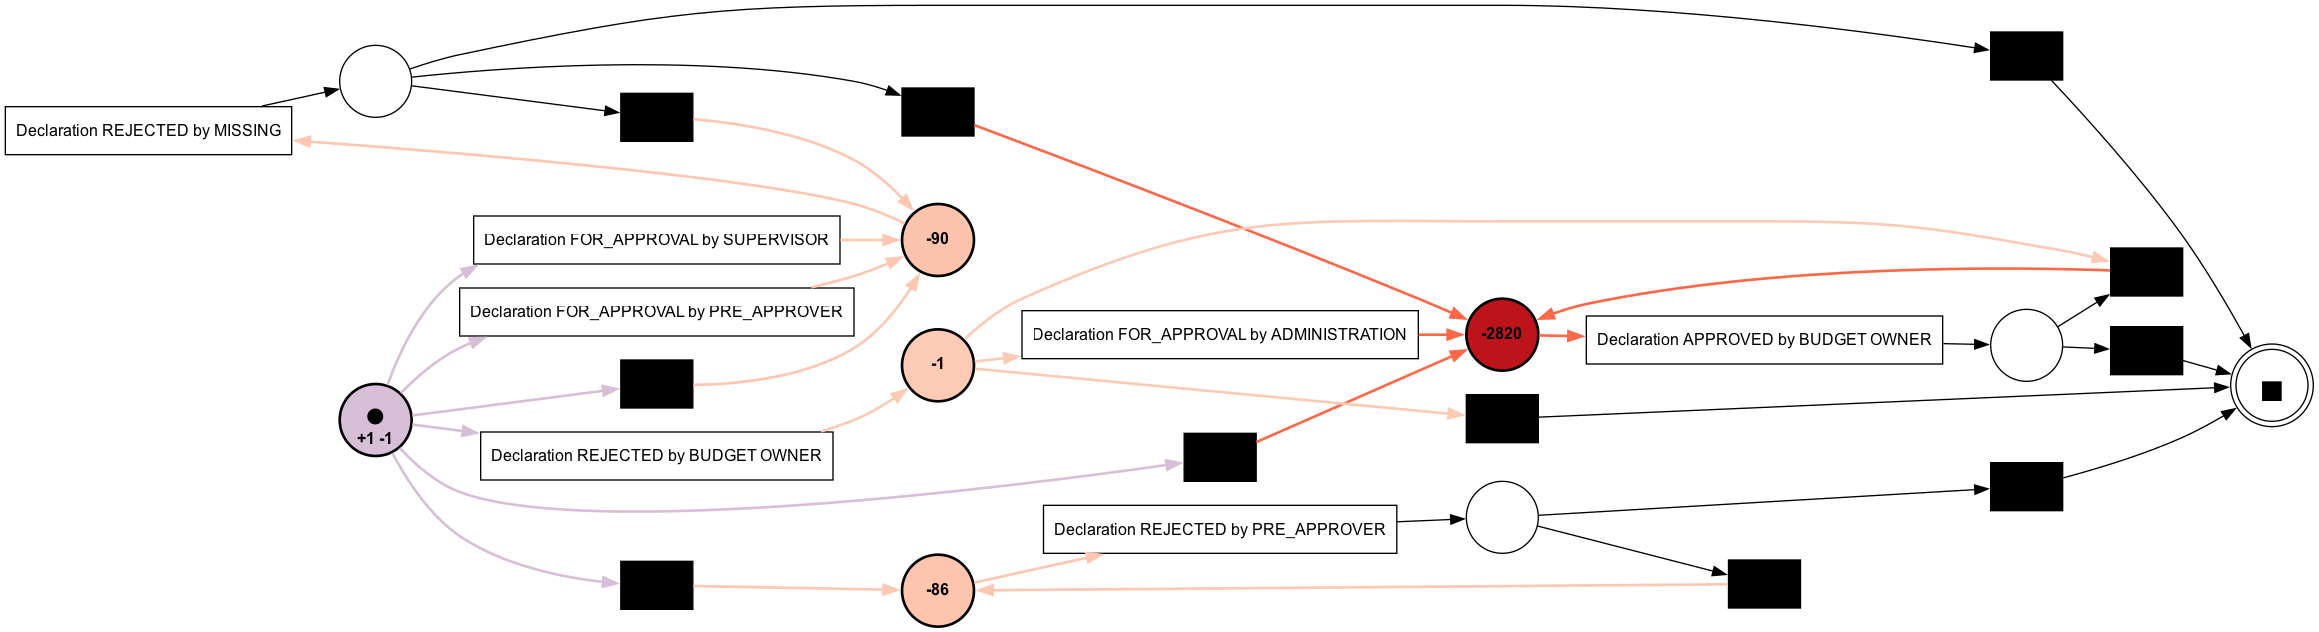

MinerType IM


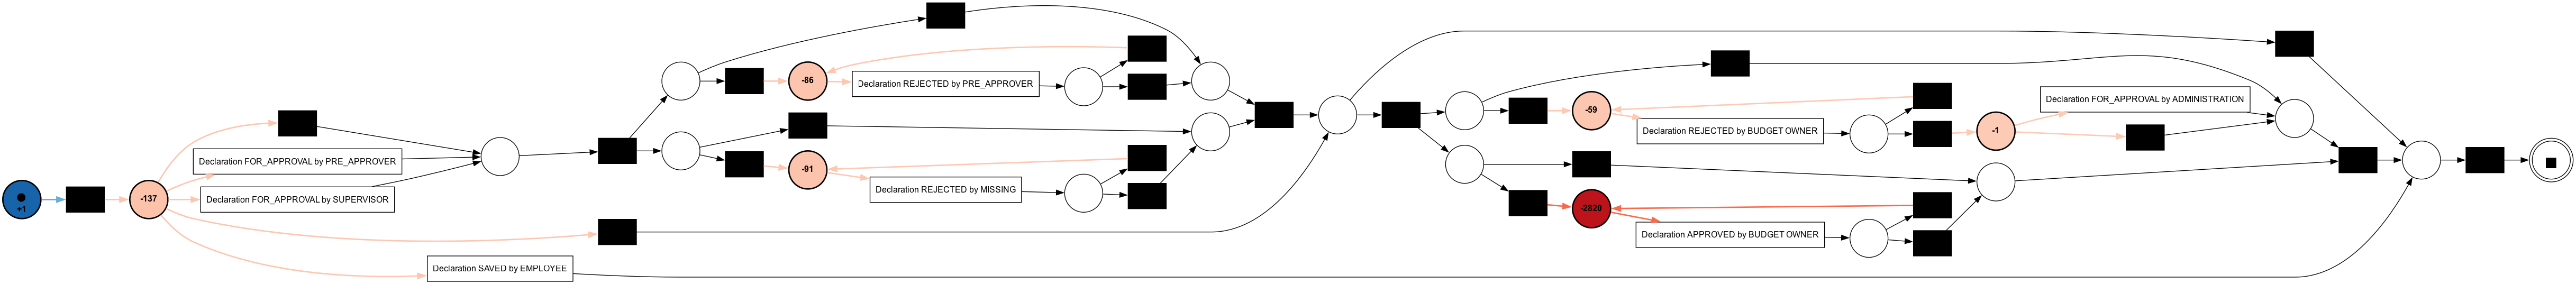

MinerType IMi


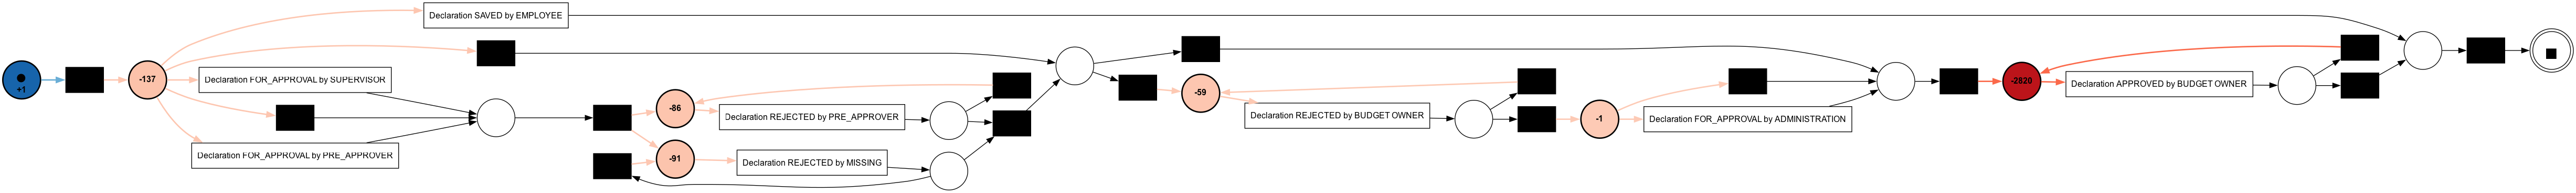

===== Pareto Efficient Models for log: sublogs_0 =====


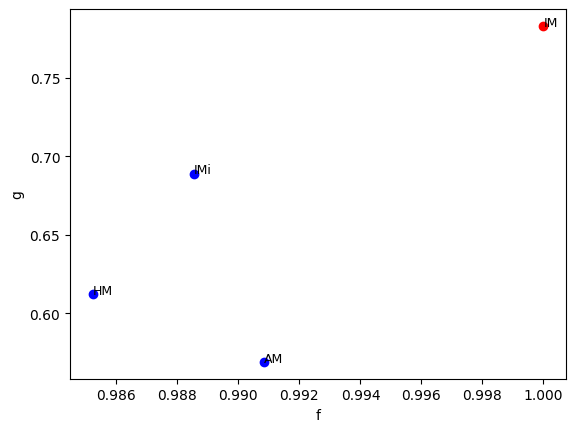

[{'type': 'IM', 'f': 1.0, 'g': 0.783079577924614}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_1.csv


replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

MinerType AM


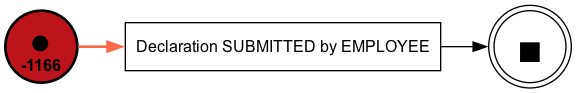

MinerType HM


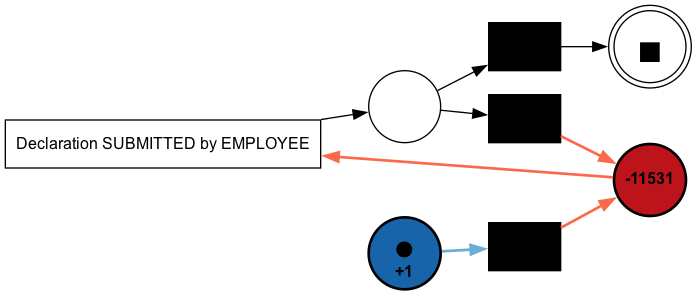

MinerType IM


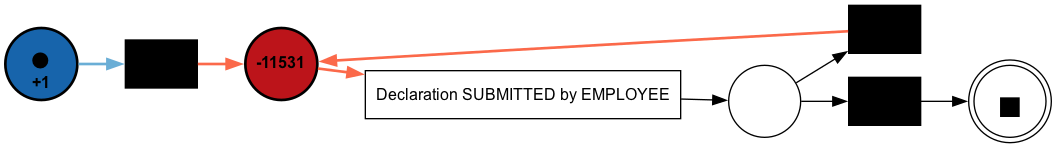

MinerType IMi


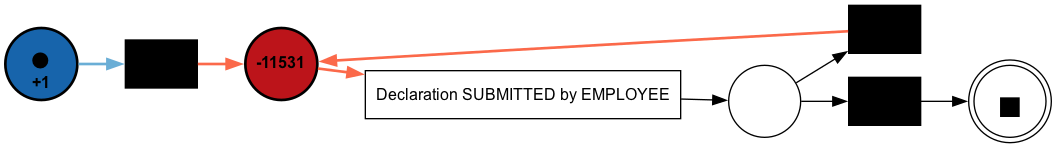

===== Pareto Efficient Models for log: sublogs_1 =====


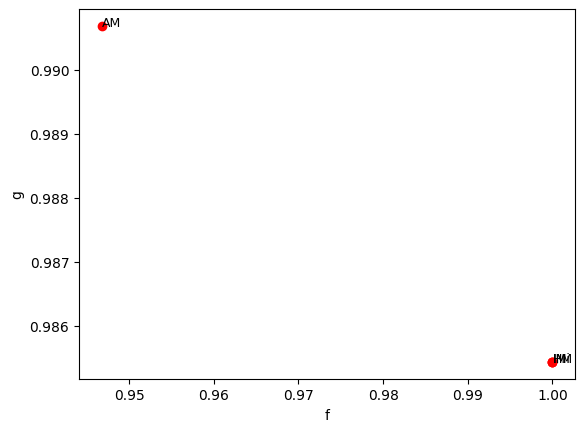

[{'type': 'AM', 'f': 0.9467482645232006, 'g': 0.9906874951072959}, {'type': 'HM', 'f': 1.0, 'g': 0.9854393567802658}, {'type': 'IM', 'f': 1.0, 'g': 0.9854393567802658}, {'type': 'IMi', 'f': 1.0, 'g': 0.9854393567802658}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_2.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


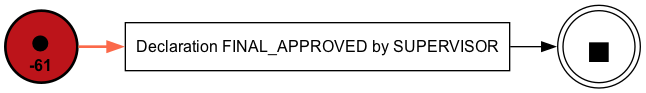

MinerType HM


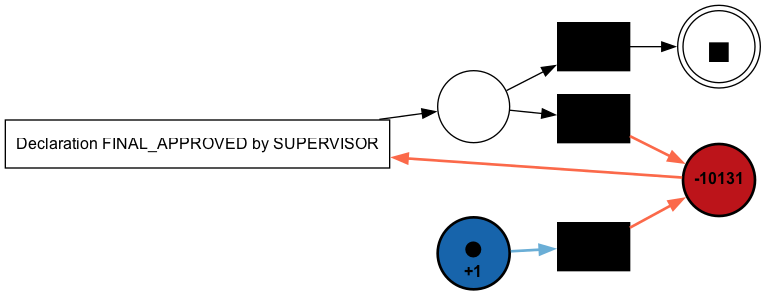

MinerType IM


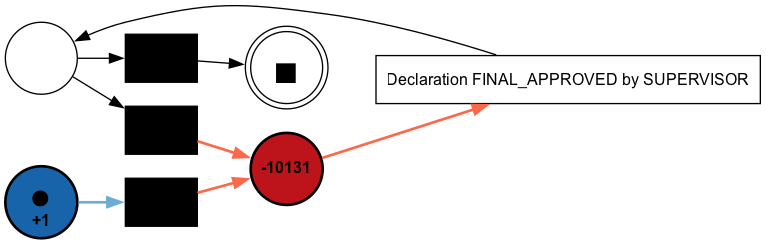

MinerType IMi


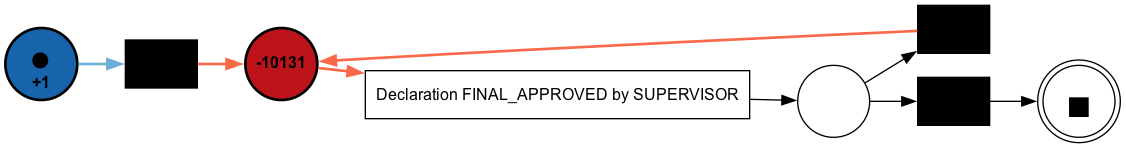

===== Pareto Efficient Models for log: sublogs_2 =====


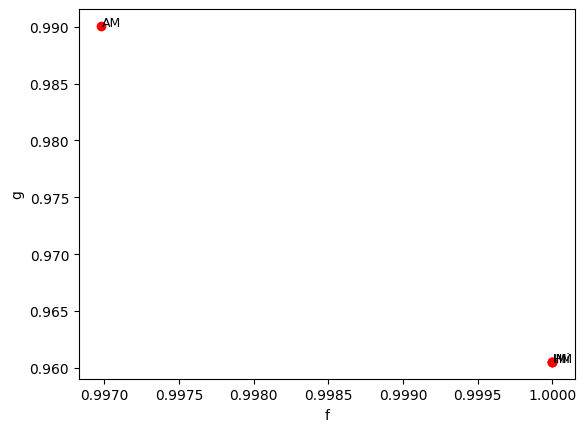

[{'type': 'AM', 'f': 0.9969803475075492, 'g': 0.9900648634081952}, {'type': 'HM', 'f': 1.0, 'g': 0.9605244045265002}, {'type': 'IM', 'f': 1.0, 'g': 0.9605244045265002}, {'type': 'IMi', 'f': 1.0, 'g': 0.9605244045265002}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_3.csv
MinerType AM


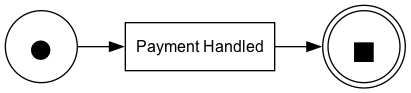

MinerType HM


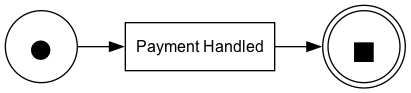

MinerType IM


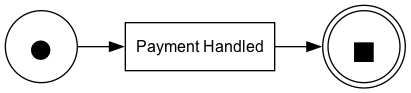

MinerType IMi


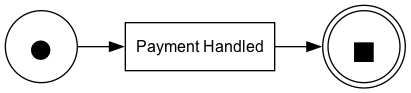

===== Pareto Efficient Models for log: sublogs_3 =====


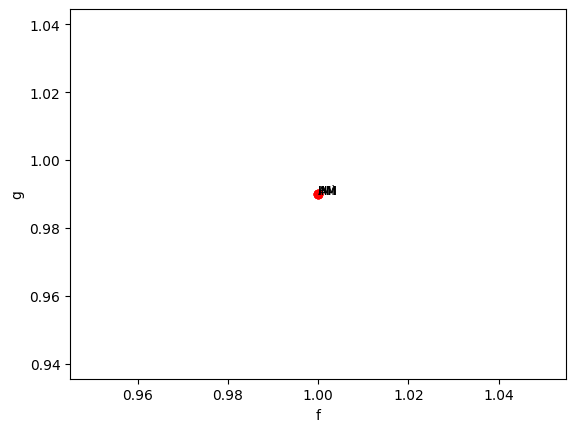

[{'type': 'AM', 'f': 1.0, 'g': 0.9900219276651792}, {'type': 'HM', 'f': 1.0, 'g': 0.9900219276651792}, {'type': 'IM', 'f': 1.0, 'g': 0.9900219276651792}, {'type': 'IMi', 'f': 1.0, 'g': 0.9900219276651792}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_4.csv
MinerType AM


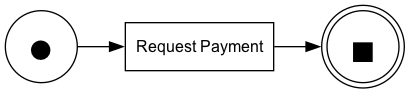

MinerType HM


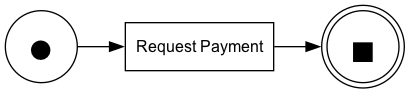

MinerType IM


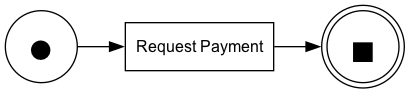

MinerType IMi


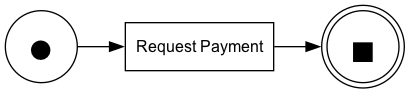

===== Pareto Efficient Models for log: sublogs_4 =====


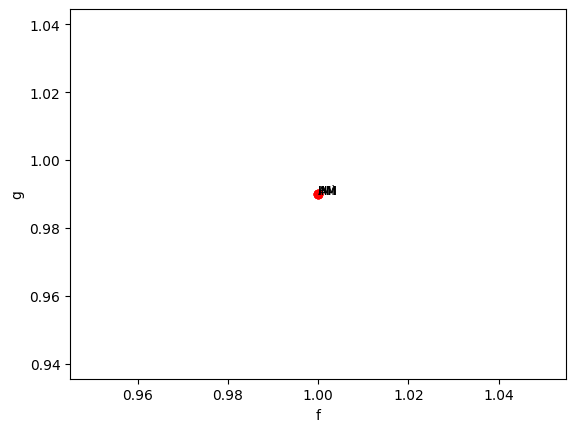

[{'type': 'AM', 'f': 1.0, 'g': 0.9900199401993025}, {'type': 'HM', 'f': 1.0, 'g': 0.9900199401993025}, {'type': 'IM', 'f': 1.0, 'g': 0.9900199401993025}, {'type': 'IMi', 'f': 1.0, 'g': 0.9900199401993025}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_5.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


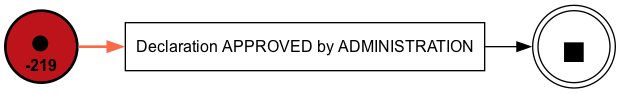

MinerType HM


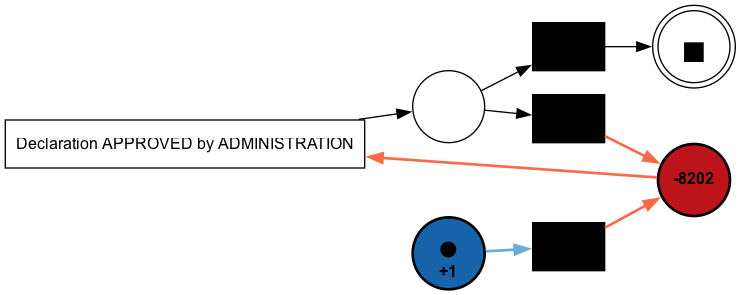

MinerType IM


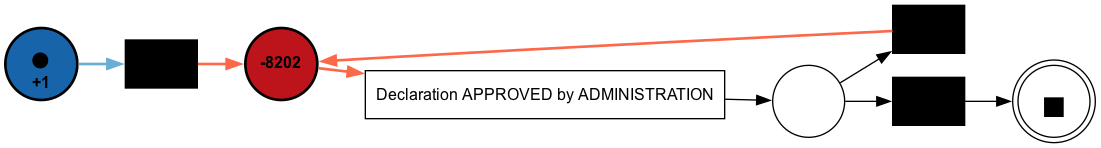

MinerType IMi


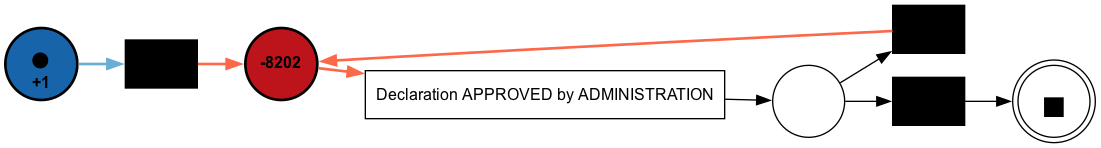

===== Pareto Efficient Models for log: sublogs_5 =====


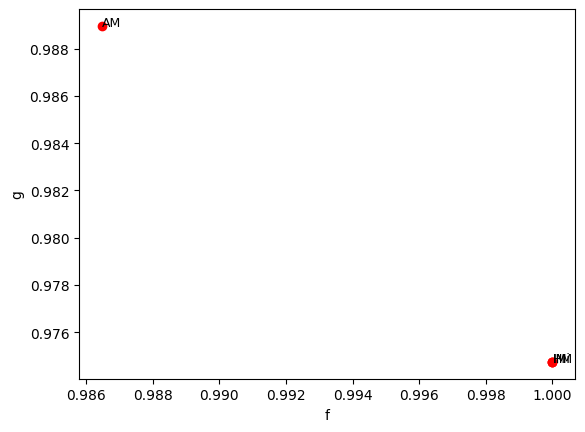

[{'type': 'AM', 'f': 0.986468952734013, 'g': 0.9889581938721408}, {'type': 'HM', 'f': 1.0, 'g': 0.9747499950257724}, {'type': 'IM', 'f': 1.0, 'g': 0.9747499950257724}, {'type': 'IMi', 'f': 1.0, 'g': 0.9747499950257724}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_6.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


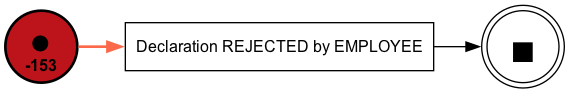

MinerType HM


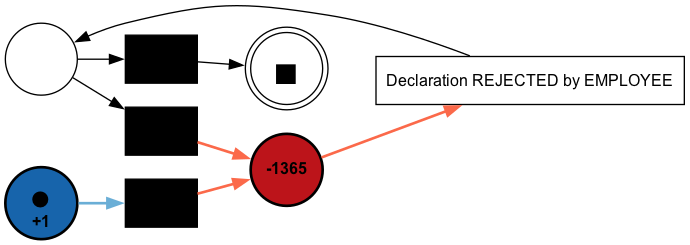

MinerType IM


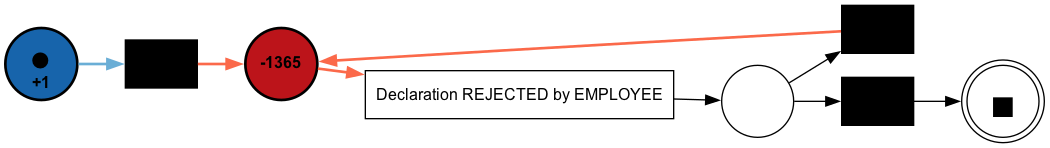

MinerType IMi


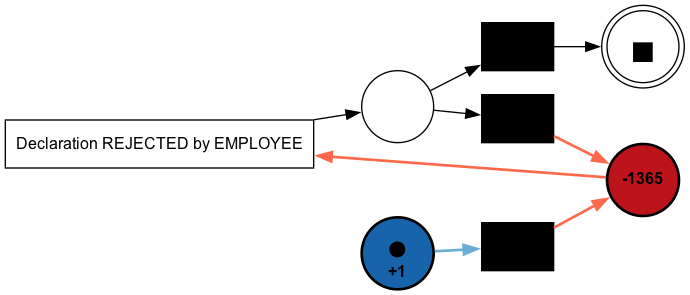

===== Pareto Efficient Models for log: sublogs_6 =====


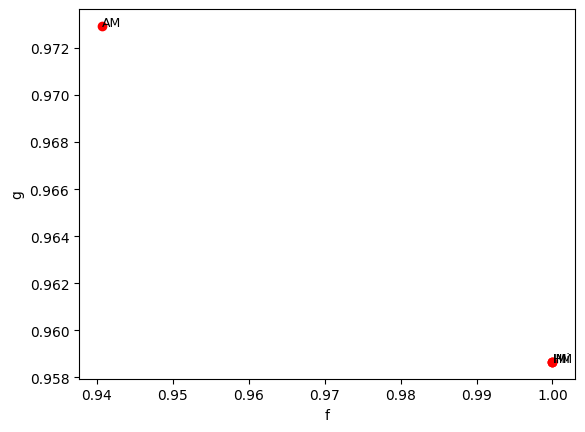

[{'type': 'AM', 'f': 0.940628637951106, 'g': 0.9729334019019616}, {'type': 'HM', 'f': 1.0, 'g': 0.9586599236485936}, {'type': 'IM', 'f': 1.0, 'g': 0.9586599236485936}, {'type': 'IMi', 'f': 1.0, 'g': 0.9586599236485936}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_7.csv


replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

MinerType AM


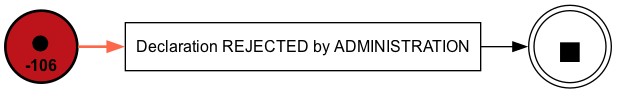

MinerType HM


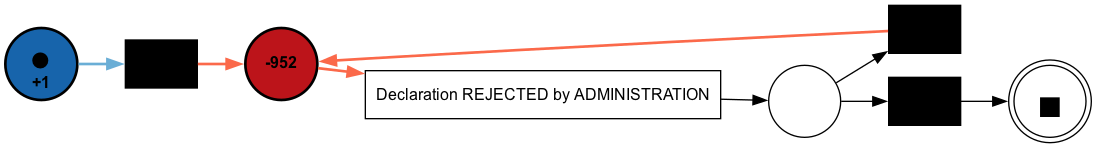

MinerType IM


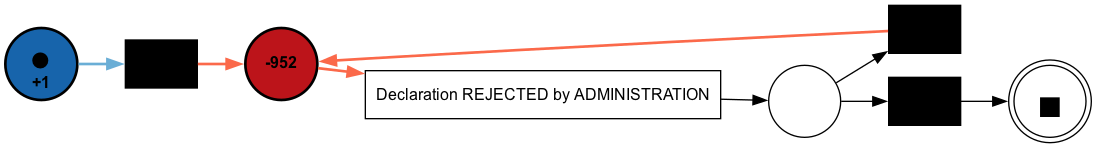

MinerType IMi


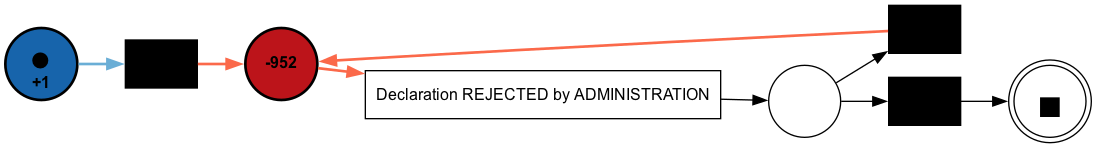

===== Pareto Efficient Models for log: sublogs_7 =====


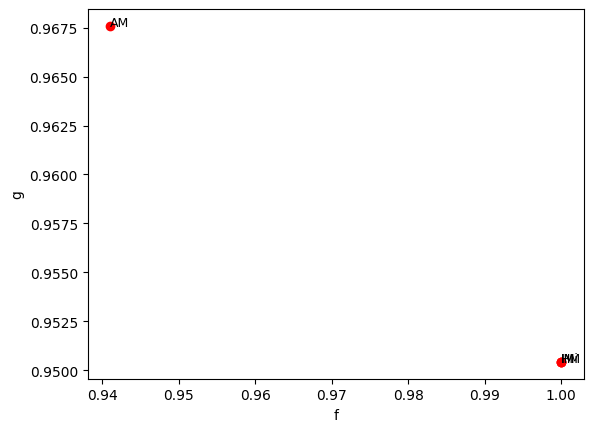

[{'type': 'AM', 'f': 0.9410456062291435, 'g': 0.9675898138223917}, {'type': 'HM', 'f': 1.0, 'g': 0.9504249527923532}, {'type': 'IM', 'f': 1.0, 'g': 0.9504249527923532}, {'type': 'IMi', 'f': 1.0, 'g': 0.9504249527923532}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_8.csv


replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

MinerType AM


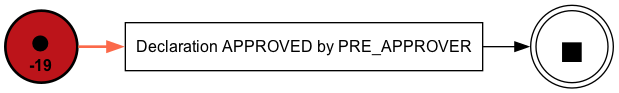

MinerType HM


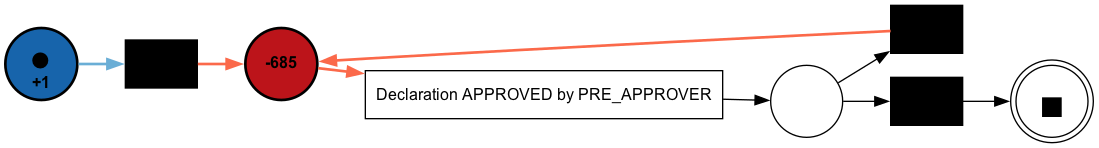

MinerType IM


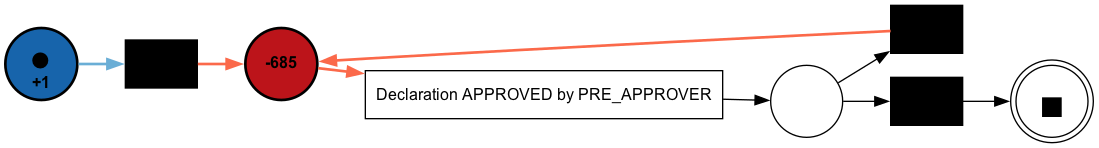

MinerType IMi


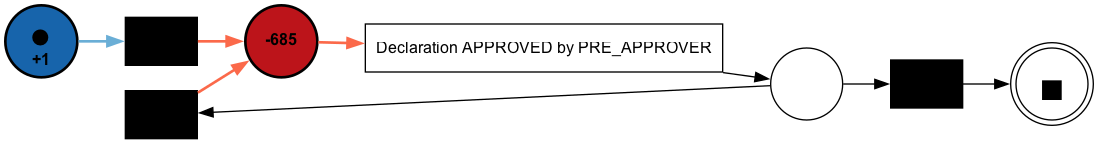

===== Pareto Efficient Models for log: sublogs_8 =====


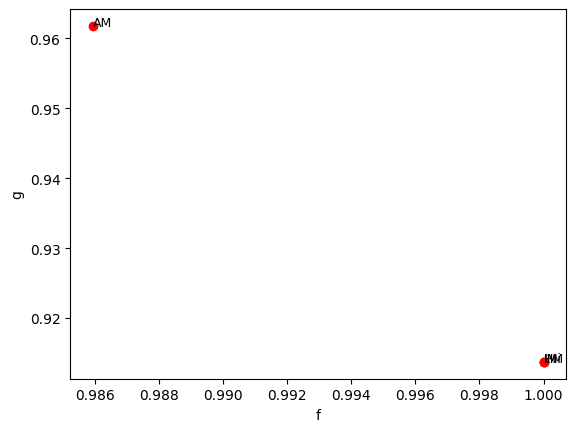

[{'type': 'AM', 'f': 0.9859363434492968, 'g': 0.9617919640049565}, {'type': 'HM', 'f': 1.0, 'g': 0.9137194510762955}, {'type': 'IM', 'f': 1.0, 'g': 0.9137194510762955}, {'type': 'IMi', 'f': 1.0, 'g': 0.9137194510762955}]
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_9.csv


replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

MinerType AM


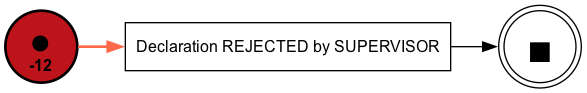

MinerType HM


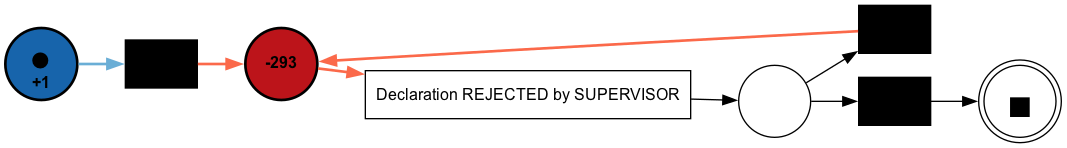

MinerType IM


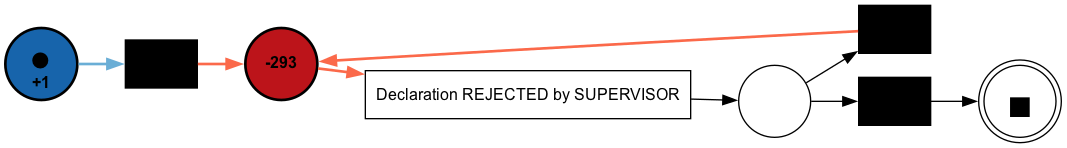

MinerType IMi


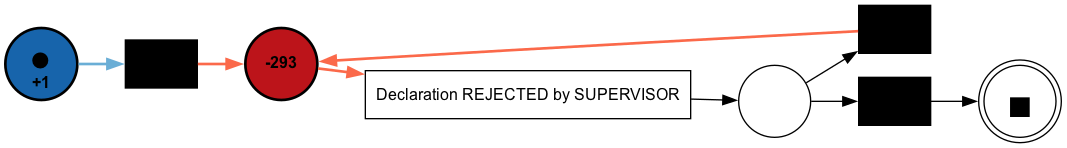

===== Pareto Efficient Models for log: sublogs_9 =====


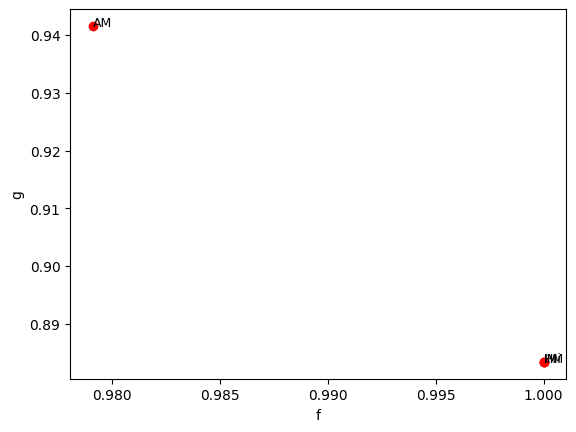

[{'type': 'AM', 'f': 0.9790940766550522, 'g': 0.9415793762163014}, {'type': 'HM', 'f': 1.0, 'g': 0.8833985610917774}, {'type': 'IM', 'f': 1.0, 'g': 0.8833985610917774}, {'type': 'IMi', 'f': 1.0, 'g': 0.8833985610917774}]


In [34]:
current_dir = os.getcwd()
sublogs_path = os.path.join(current_dir, 'base_approach')
compare_sub_logs(sublogs_path)